# Numpy 이용 Multi-variate Linear Regression 구현

- 참고한 사이트: https://wikidocs.net/54841 중 "03. 다중 선형 회귀" 파트

- input : $x_{i} \in \mathbb{R}^{n}$
- output : $y_{i} \in \mathbb{R}$
- error function : SSE $\frac{1}{2}\sum_{i=1}^{n}(y_{i} - x_{i})^{2}$ or MSE $\frac{1}{n}\sum_{i=1}^{n}(y_{i} - x_{i})^{2}$ or else (경사손실법으로 학습 가능한 함수는 다 ok)
- learning algorithm : gradient descent

- Multi-variate Regression: y = $w_{1}$ $x_{1}$ + $w_{2}$ $x_{2}$ + ... + b

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 임의의 X와 Y 생성
X = np.random.randint(0,10, size = (2,3))  # X_i.shape = (1,3) = (3,)
Y = np.random.randint(0,5, size = 2) # Y_i.shape = (1,)

print(f'X; {X}, X.shape: {X.shape}')
print(f'Y: {Y}, Y.shape: {Y.shape}')

X; [[0 4 5]
 [7 0 9]], X.shape: (2, 3)
Y: [2 1], Y.shape: (2,)


In [ ]:
# 구현용

class LinearModel:
  def __init__(
    self
  ):
    """선형 회귀 모형 초기화. y = w1x1 + w2x2 + ... + b
    """
    self.W = 0.   # 인스턴스 변수로 W, b, lr 선언
    self.b = 0.
    self.lr = 0.001

  def forward(
    self,
    X: np.array,
    Y: np.array
  ) -> (np.array, np.array):
    
    self.W = np.full(X.shape[1], fill_value = 1)

    '''
    X.shape = (m,n) => 본 코드에서는 X.shape = (2,3)
    W.shape = (n,)  =>               W.shape = (3,)
    b.shape = (1,)  =>               b.shape = (1,)
    Y.shape = (m,)  =>               Y.shape = (2,)
    '''

    # 입력 데이터로부터 y_hat과 error 값을 구하는 부분
    y_hat = np.dot(X, self.W) + self.b  # 현재 y_hat = np.dot(X, self.W) + self.b라고 짰는데, y_hat.shape = (2,) 가 아니라 (2,3)이 나오는 상황,,,
    error = (y_hat - Y) ** 2

    return y_hat, error

    raise NotImplementedError


  def backward(      # backward() 함수는 input으로 loss만 들어감
    self,
    loss: np.array
  ):
    # error 값을 이용해서 W, b 값을 업데이트하는 부분 
    
    # Multi-variate 에서는 X와 W 가 각각 행렬, 벡터 형태니까 인덱싱 하면서 해야할 듯.
    
    # 방법1) w_1, w_2, w_3 하나씩 쓴 거
    # self.W[0] = self.W[0] - self.lr*((y_hat - Y)*X[:,0]).mean()
    # self.W[1] = self.W[1] - self.lr*((y_hat - Y)*X[:,1]).mean()
    # self.W[2] = self.W[2] - self.lr*((y_hat - Y)*X[:,2]).mean()


    # 방법2) W 업데이트 하는 거 간소화 하면
    for i in range(X.shape[1]):
        self.W[i] = self.W[i] - self.lr*((y_hat - Y)*X[:,i]).mean()
        
    # Bias 업데이트
    self.b = self.b - self.lr*(y_hat - Y).mean()

    return self.W, self.b  # backward() 함수가 호출되면 backward() 함수의 결과인 self.W와 self.b가 다시 LinearModel 인스턴스의 W와 b에 저장됨

    raise NotImplementedError

실제값:  [2 1]
예측값:  [-2.  5.]
y = 0.0000x_1 + 1.0000x_2 + 0.0000x_3 + -11.0000


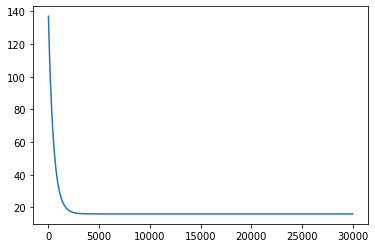

In [ ]:
epochs = 30000
model = LinearModel()
losses = []
for _ in range(epochs):  # 특정 변수명을 사용한 것이 아니라 _을 했네! for문 안에 특정 변수명(ex. i)을 사용하지 않아서 이렇게 해도 되는구나
  y_hat, loss = model.forward(X, Y)  # y_hat 및 Loss 계산 (Feed-forward)
  model.backward(loss)  # Gradient Descent 이용 Backpropagation 수행
  losses.append(np.mean(loss)) # 매 에포크마다 평균 Loss 값 구해서 losses라는 리스트에 저장
print("실제값: ",Y)
print("예측값: ", y_hat)
print('y = {0:.4f}x_1 + {1:.4f}x_2 + {2:.4f}x_3 + {3:.4f}'.format(model.W[0], model.W[1], model.W[2], model.b))
plt.plot(range(epochs), losses)